### EE399 HW3
### Xinqi Chen, April 20, 2023

GitHub page: https://github.com/Mmmo-C/Handwritten-Digit-Classification

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X = mnist['data']
y = mnist['target']
print("Data loaded")

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Data loaded


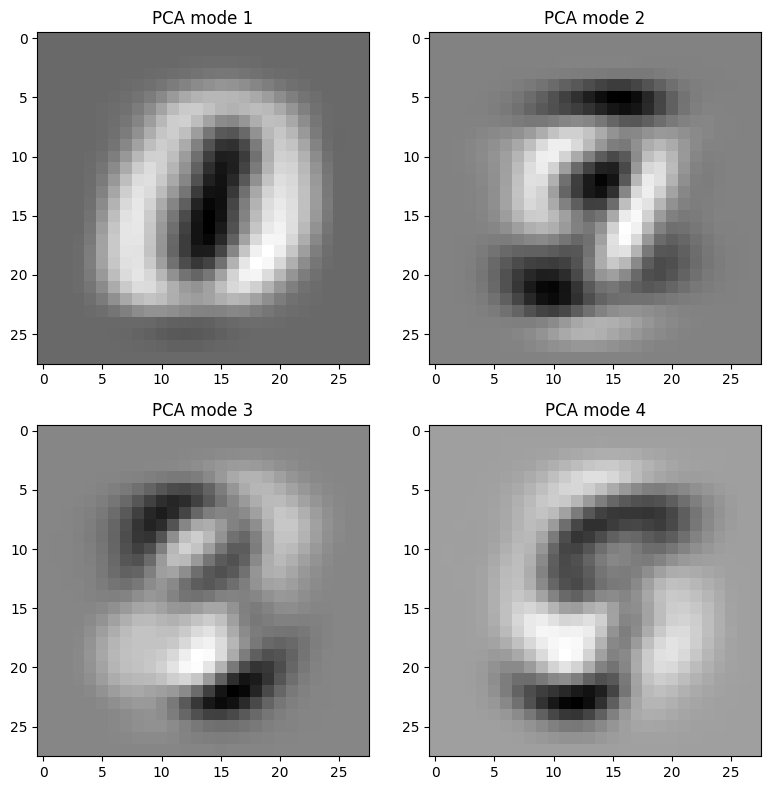

In [3]:
from sklearn.decomposition import PCA
# Plot the first 4 principal components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axs = axs.ravel()

for i in range(4):
    axs[i].imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f'PCA mode {i+1}')

plt.tight_layout()
plt.show()

### Part 1 & 2

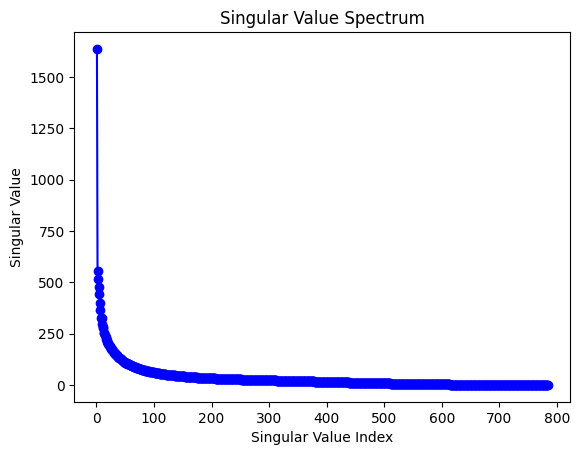

In [ ]:
X = mnist.data.astype(float) / 255.0
# Reshape each image into a column vector
X = X.T # Transpose to have columns as images

# Perform SVD on the data matrix
svd = TruncatedSVD(n_components=784) # Keep all components for full rank
X_svd = svd.fit_transform(X)

# Extract the singular values, left singular vectors, and right singular vectors
singular_values = svd.singular_values_
left_singular_vectors = svd.components_
right_singular_vectors = X_svd / singular_values

# Plot the singular value spectrum
plt.plot(range(1, len(singular_values) + 1), singular_values, 'bo-')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Value Spectrum')
plt.show()

### Part 3

In [ ]:
# Calculate the rank of the digit space
rank_r = np.sum(singular_values > 1e-10) # Use a threshold of 1e-10 for small singular values
print('Rank of the digit space:', rank_r)

# Interpretation of U, Σ, and V matrices
U = left_singular_vectors.T # Transpose to have rows as images
Sigma = np.diag(singular_values)
V = right_singular_vectors.T # Transpose to have rows as images

print('Shape of U:', U.shape)
print('Shape of Sigma:', Sigma.shape)
print('Shape of V:', V.shape)

Rank of the digit space: 713
Shape of U: (70000, 784)
Shape of Sigma: (784, 784)
Shape of V: (784, 784)


### Part 4

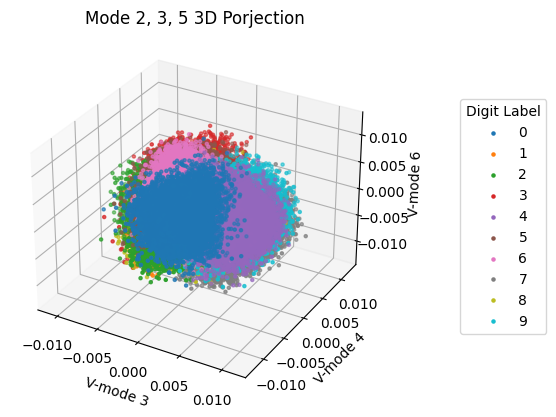

In [ ]:
# Perform SVD on the data
U, s, Vt = np.linalg.svd(X, full_matrices=False)
# Select the desired V-modes
v_modes = [2, 3, 5]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the selected modes colored by digit label
for i in range(10):
    idx = np.where(y == str(i))[0]
    ax.scatter(Vt[v_modes[0], idx], Vt[v_modes[1], idx], Vt[v_modes[2], idx], label=str(i), s=5)

# Add labels and legend
ax.set_xlabel('V-mode ' + str(v_modes[0] + 1))
ax.set_ylabel('V-mode ' + str(v_modes[1] + 1))
ax.set_zlabel('V-mode ' + str(v_modes[2] + 1))
ax.legend(title='Digit Label', loc='center left', bbox_to_anchor=(1.2, 0.5))
ax.set_title("Mode 2, 3, 5 3D Porjection")
plt.show()

In [ ]:
# Pick traning and testing data set
X_train = X[:5000]
X_test = X[5000:]
y_train = y[:5000]
y_test = y[5000:]

### Part 5

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Select two digits to classify
digit1 = 3
digit2 = 8

# Create a binary label array for the two selected digits
y_binary = np.where((y_train == str(digit1)) | (y_train == str(digit2)), 1, 0)

# Perform PCA on the training data
U_train, s_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)
Vt_train_pca = Vt_train[:3, :].T  # Use first 3 V-modes for PCA

# Project the training data onto the first 3 PCA modes
X_train_pca = np.dot(X_train, Vt_train_pca)

# Perform LDA on the projected data
lda = LDA()
lda.fit(X_train_pca, y_binary)

# Project the test data onto the first 3 PCA modes
U_test, s_test, Vt_test = np.linalg.svd(X_test, full_matrices=False)
Vt_test_pca = Vt_test[:3, :].T  # Use first 3 V-modes for PCA
X_test_pca = np.dot(X_test, Vt_test_pca)

# Predict the binary labels for the test data using the trained LDA classifier
y_pred = lda.predict(X_test_pca)

# Calculate accuracy of the classifier
y_binary_test = np.where((y_test == str(digit1)) | (y_test == str(digit2)), 1, 0)
accuracy = np.mean(y_pred == y_binary_test)
print('Accuracy:', accuracy)

Accuracy: 0.8084923076923077


### Part 6

In [ ]:
# Select three digits to classify
digit1 = 3
digit2 = 8
digit3 = 1

# Create a binary label array for the three selected digits
y_binary = np.where((y_train == str(digit1)) | (y_train == str(digit2)) | (y_train == str(digit3)), 1, 0)

# Perform PCA on the training data
U_train, s_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)
Vt_train_pca = Vt_train[:3, :].T  # Use first 3 V-modes for PCA

# Project the training data onto the first 3 PCA modes
X_train_pca = np.dot(X_train, Vt_train_pca)

# Perform LDA on the projected data
lda = LDA()
lda.fit(X_train_pca, y_binary)

# Project the test data onto the first 3 PCA modes
U_test, s_test, Vt_test = np.linalg.svd(X_test, full_matrices=False)
Vt_test_pca = Vt_test[:3, :].T  # Use first 3 V-modes for PCA
X_test_pca = np.dot(X_test, Vt_test_pca)

# Predict the binary labels for the test data using the trained LDA classifier
y_pred = lda.predict(X_test_pca)

# Calculate accuracy of the classifier
y_binary_test = np.where((y_test == str(digit1)) | (y_test == str(digit2)) | (y_test == str(digit3)), 1, 0)
accuracy = np.mean(y_pred == y_binary_test)
print('Accuracy:', accuracy)

Accuracy: 0.8209076923076923


### Part 7 & 8

In [ ]:
from itertools import combinations
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Get all combinations of pairs of digits
digit_pairs = list(combinations(range(10), 2))

# Initialize dictionary to store accuracy for each digit pair
accuracy_dict = {}

# Loop through each digit pair
for digit1, digit2 in digit_pairs:
    # Create binary label arrays for the two digits
    y_binary = np.where((y_train == str(digit1)) | (y_train == str(digit2)), 1, 0)

    # Perform PCA on the training data
    U_train, s_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)
    Vt_train_pca = Vt_train[:3, :].T  # Use first 3 V-modes for PCA

    # Project the training data onto the first 3 PCA modes
    X_train_pca = np.dot(X_train, Vt_train_pca)

    # Perform LDA on the projected data
    lda = LDA()
    lda.fit(X_train_pca, y_binary)

    # Project the test data onto the first 3 PCA modes
    U_test, s_test, Vt_test = np.linalg.svd(X_test, full_matrices=False)
    Vt_test_pca = Vt_test[:3, :].T  # Use first 3 V-modes for PCA
    X_test_pca = np.dot(X_test, Vt_test_pca)

    # Predict the binary labels for the test data using the trained LDA classifier
    y_pred = lda.predict(X_test_pca)

    # Calculate accuracy of the classifier
    y_binary_test = np.where((y_test == str(digit1)) | (y_test == str(digit2)), 1, 0)
    accuracy = np.mean(y_pred == y_binary_test)
    
    # Store accuracy in dictionary
    accuracy_dict[(digit1, digit2)] = accuracy

# Find the digit pair with the lowest accuracy
most_difficult_digits = min(accuracy_dict, key=accuracy_dict.get)
lowest_accuracy = accuracy_dict[most_difficult_digits]
# Find the digit pair with the highest accuracy
most_easy_digits = max(accuracy_dict, key=accuracy_dict.get)
highest_accuracy = accuracy_dict[most_easy_digits]

print("The most difficult digits to separate are:", most_difficult_digits)
print("Accuracy of separation with LDA on the test data:", lowest_accuracy)
print("The easiest digits to separate are:", most_easy_digits)
print("Accuracy of separation with LDA on the test data:", highest_accuracy)


The most difficult digits to separate are: (0, 1)
Accuracy of separation with LDA on the test data: 0.7854769230769231
The most easy digits to separate are: (1, 2)
Accuracy of separation with LDA on the test data: 0.8813384615384615


### Part 9

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create SVM classifier with default hyperparameters
svm_clf = SVC()

# Fit the SVM classifier to the training data
svm_clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_svm = svm_clf.predict(X_test)

# Calculate accuracy of SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy of SVM Classifier on test data:", accuracy_svm)


Accuracy of SVM Classifier on test data: 0.9489538461538461


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier with default hyperparameters
dt_clf = DecisionTreeClassifier()

# Fit the Decision Tree classifier to the training data
dt_clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_dt = dt_clf.predict(X_test)

# Calculate accuracy of Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy of Decision Tree Classifier on test data:", accuracy_dt)


Accuracy of Decision Tree Classifier on test data: 0.7718923076923077


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import itertools

# Instantiate the SVM classifier
svm_clf = SVC()

# Train the SVM classifier on the training data
svm_clf.fit(X_train, y_train)

# List of all possible pairs of digits
digit_pairs = list(itertools.combinations(range(10), 2))

# Initialize variables to keep track of highest and lowest accuracy
highest_accuracy = 0.0
lowest_accuracy = 1.0
highest_accuracy_pair = None
lowest_accuracy_pair = None

# Loop through each digit pair and calculate accuracy
for pair in digit_pairs:
    digit1, digit2 = pair
    # Filter test data for the current pair of digits
    mask = np.logical_or(y_test == str(digit1), y_test == str(digit2))
    X_pair = X_test[mask]
    y_pair = y_test[mask]
    # Check if there are at least some samples for the current pair of digits
    if len(X_pair) > 0:
        # Predict the labels for the current pair of digits
        y_pred_pair = svm_clf.predict(X_pair)
        # Calculate accuracy for the current pair of digits
        accuracy_pair = accuracy_score(y_pair, y_pred_pair)
        # Update highest and lowest accuracy and corresponding digit pair
        if accuracy_pair > highest_accuracy:
            highest_accuracy = accuracy_pair
            highest_accuracy_pair = pair
        if accuracy_pair < lowest_accuracy:
            lowest_accuracy = accuracy_pair
            lowest_accuracy_pair = pair
    else:
        print("No samples found for digits", digit1, "and", digit2)

# Print the digit pair with the highest and lowest accuracy
print("Digit pair with highest accuracy:", highest_accuracy_pair, "with accuracy", highest_accuracy)
print("Digit pair with lowest accuracy:", lowest_accuracy_pair, "with accuracy", lowest_accuracy)


Digit pair with highest accuracy: (0, 1) with accuracy 0.9810016013975833
Digit pair with lowest accuracy: (3, 9) with accuracy 0.9222790023644268


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import itertools

# Instantiate the Decision Tree classifier
dt_clf = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt_clf.fit(X_train, y_train)

# List of all possible pairs of digits
digit_pairs = list(itertools.combinations(range(10), 2))

# Initialize variables to keep track of highest and lowest accuracy
highest_accuracy = 0.0
lowest_accuracy = 1.0
highest_accuracy_pair = None
lowest_accuracy_pair = None

# Loop through each digit pair and calculate accuracy
for pair in digit_pairs:
    digit1, digit2 = pair
    # Filter test data for the current pair of digits
    mask = np.logical_or(y_test == str(digit1), y_test == str(digit2))
    X_pair = X_test[mask]
    y_pair = y_test[mask]
    # Check if there are at least some samples for the current pair of digits
    if len(X_pair) > 0:
        # Predict the labels for the current pair of digits
        y_pred_pair = dt_clf.predict(X_pair)
        # Calculate accuracy for the current pair of digits
        accuracy_pair = accuracy_score(y_pair, y_pred_pair)
        # Update highest and lowest accuracy and corresponding digit pair
        if accuracy_pair > highest_accuracy:
            highest_accuracy = accuracy_pair
            highest_accuracy_pair = pair
        if accuracy_pair < lowest_accuracy:
            lowest_accuracy = accuracy_pair
            lowest_accuracy_pair = pair
    else:
        print("No samples found for digits", digit1, "and", digit2)

# Print the digit pair with the highest and lowest accuracy
print("Digit pair with highest accuracy:", highest_accuracy_pair, "with accuracy", highest_accuracy)
print("Digit pair with lowest accuracy:", lowest_accuracy_pair, "with accuracy", lowest_accuracy)


Digit pair with highest accuracy: (0, 1) with accuracy 0.8757461056922405
Digit pair with lowest accuracy: (5, 8) with accuracy 0.6837118117954583
